In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
#Read raw file
df=pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [182]:
#show data first five rows
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [183]:

df.iloc[0:10,:11].head()


,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile


In [184]:
df.iloc[:,11:].head()

,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1.195762,1023,5,0,NaN,NaN
1,0.809002,1076,1,0,NaN,NaN
2,1.153570,1095,2,0,NaN,NaN
3,0.609503,1003,1,0,NaN,NaN
4,0.359971,1012,4,0,NaN,NaN


<Axes: xlabel='Churned', ylabel='Count'>

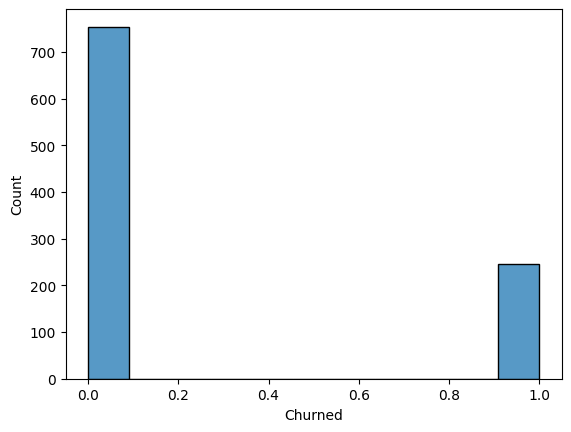

In [185]:
#Output Churn 0=Not lost 1=loss
sns.histplot(df['Churned'])

In [186]:
# univariate analysis
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


## Data Cleaning

### Outlier

In [187]:
#find outlier：Monthly_Hours_Watched
df[df['Monthly_Hours_Watched'] == 139.17040801849285]

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
697,698,63,Female,South,2021-07-15 01:53:37.664613,Standard,14.99,Credit Card,139.170408,Sci-Fi,Mobile,1.332512,1064,2,0,NaN,NaN


In [188]:
#replace outliers 139.170408 to 19
df['Monthly_Hours_Watched'] = df['Monthly_Hours_Watched'].replace(139.17040801849285, 19)

In [189]:
#Complete replacement of outliers
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,18.951483,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,18.900599,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.254681,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,127.764432,11.417557,1099.000000,5.000000,1.000000


### Check missing value

In [190]:
#Check the missing value
data = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')
missing_values = data.isnull().sum()
print(missing_values)

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64


In [191]:
#Check if there is a missing value for Churn is 1
churned_data = data[data['Churned'] == 1]
missing_churned = churned_data[['Date_of_Churn', 'Reason_for_Churn']].isnull().sum()
print(missing_churned)

Date_of_Churn       0
Reason_for_Churn    0
dtype: int64


## Analysis relationship between factors and Churned

### ①check the situation of churning 

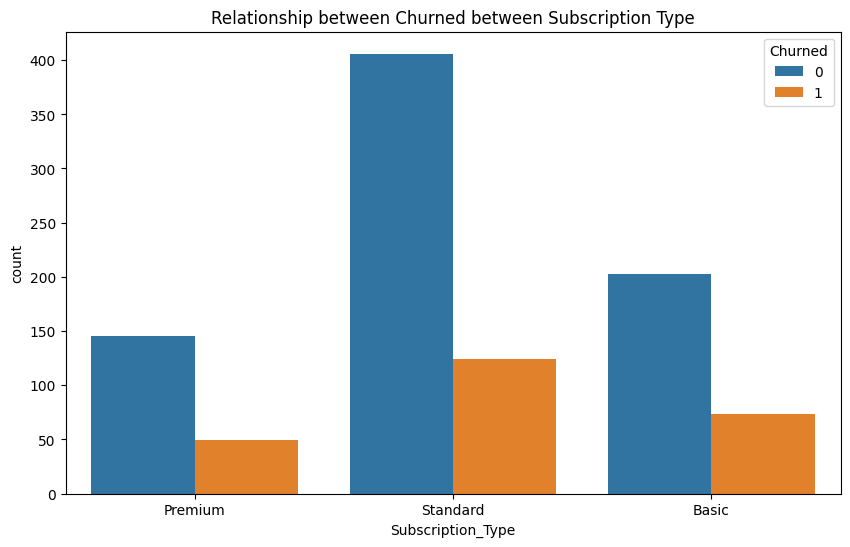

In [192]:
# Visualize user churned
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Subscription_Type', hue='Churned')
plt.title('Relationship between Churned between Subscription Type')
plt.show()
#Standard has more churned customers

### ②Check the reasons of churning

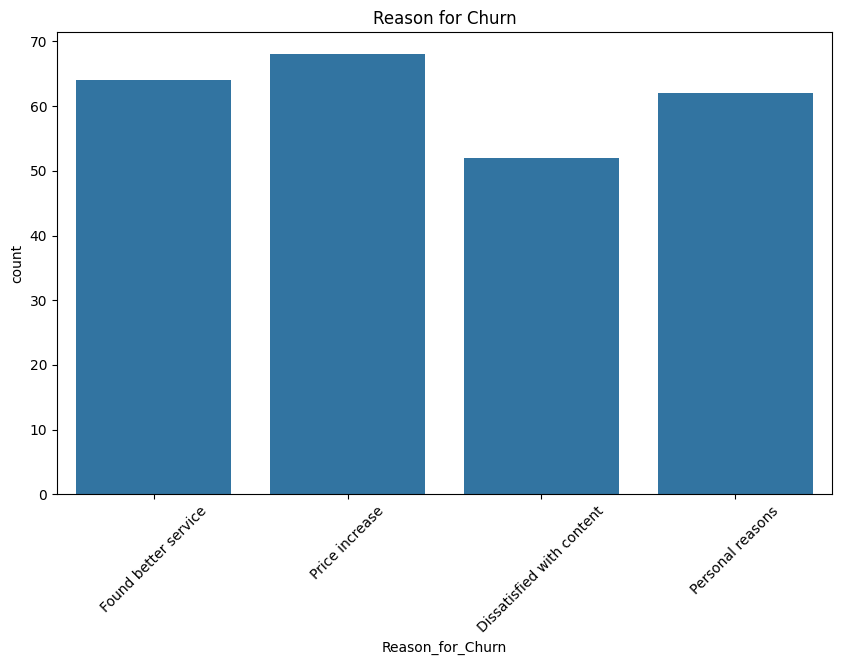

In [193]:
# reason for user churned
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Reason_for_Churn')
plt.title('Reason for Churn')
plt.xticks(rotation=45)
plt.show()
#the most common reason for churn is due to price increases

### ③Relationship between churned and user monthly hours watched

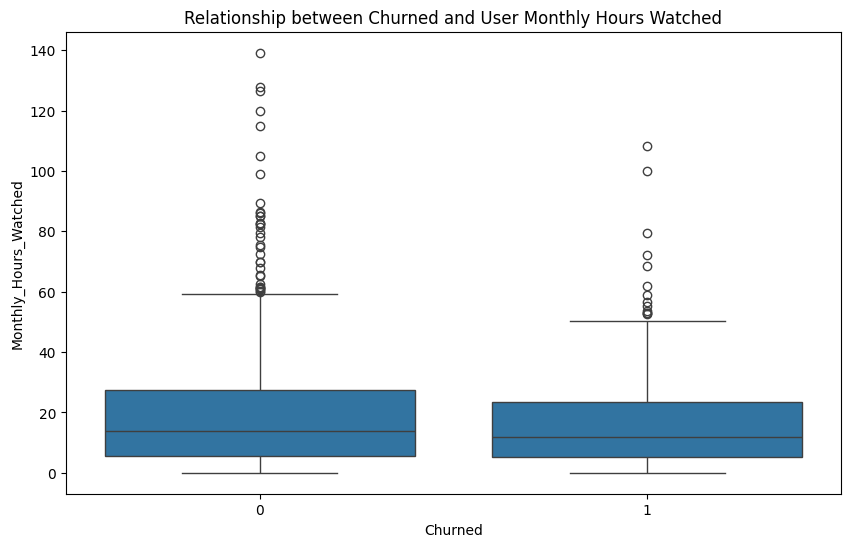

         count       mean        std       min      25%        50%        75%  \
Churned                                                                         
0        754.0  19.734607  19.866013  0.076891  5.65705  13.791423  27.368681   
1        246.0  17.039672  17.236483  0.041574  5.10589  11.948593  23.618435   

                max  
Churned              
0        139.170408  
1        108.122364  


In [194]:
# Analyze the relationship between churned and user monthly hours watched
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Churned', y='Monthly_Hours_Watched')
plt.title('Relationship between Churned and User Monthly Hours Watched')
plt.show()

# Statistics on monthly hours watched
monthly_hours_stats = data.groupby('Churned')['Monthly_Hours_Watched'].describe()
print(monthly_hours_stats)

#The mean of churn customers being 2.7 hours less than that of non churn customers

### ④Relationship between churned and Age

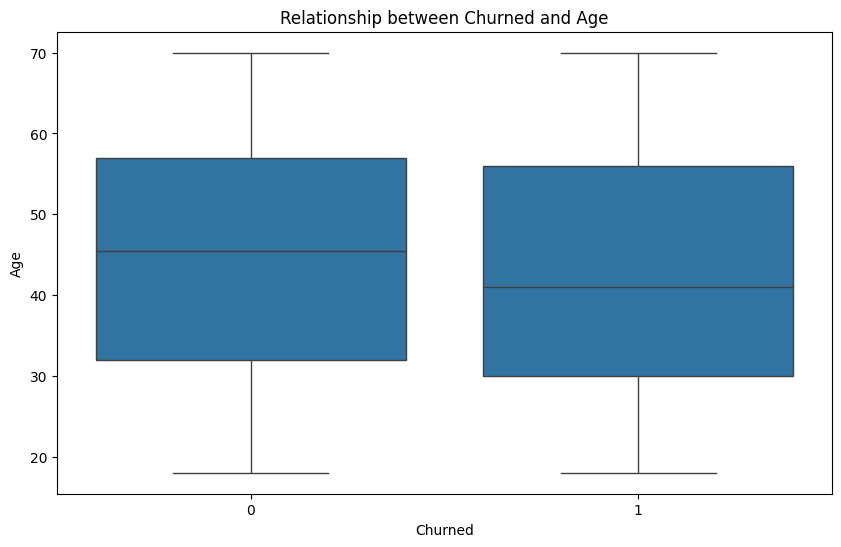

In [195]:
# Analyze the relationship between churned and Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Churned', y='Age')
plt.title('Relationship between Churned and Age')
plt.show()
# No significant effect

###  ⑤Relationship between churned and Gender

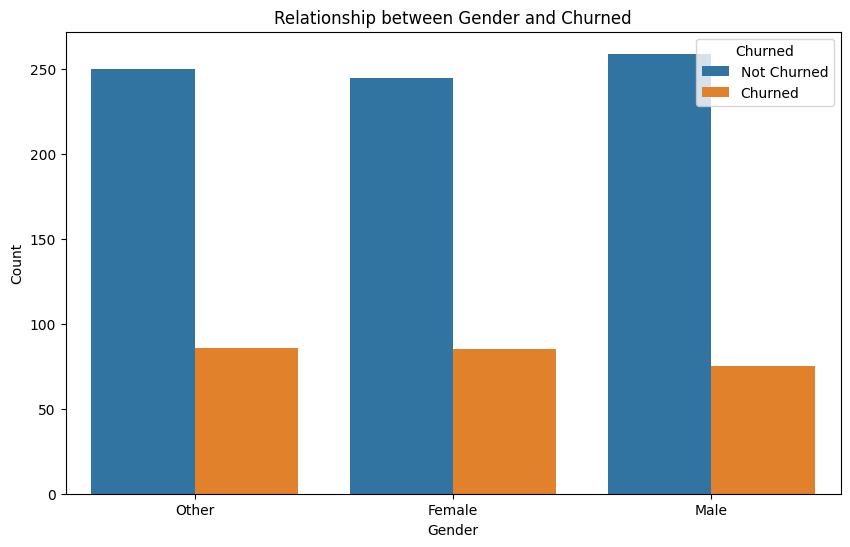

In [196]:
# Analyze the relationship between churned and Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', hue='Churned')
plt.title('Relationship between Gender and Churned')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churned', labels=['Not Churned', 'Churned'])
plt.show()
# No significant effect

### ⑥Relationship between churned and location

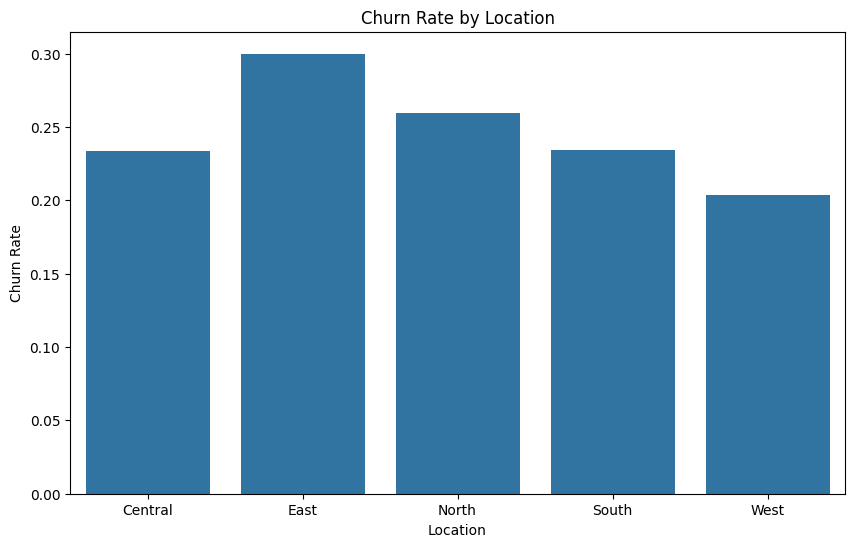

In [197]:
# Analyze the relationship between churned and location
# Caculate churn rate in each location
location_churn_rate = data.groupby('Location')['Churned'].mean().reset_index()
location_churn_rate.columns = ['Location', 'Churn_Rate']

# visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=location_churn_rate, x='Location', y='Churn_Rate')
plt.title('Churn Rate by Location')
plt.xlabel('Location')
plt.ylabel('Churn Rate')
plt.show()
#The highest churn rate for customers living in the east

### ⑦Relationship between rating given & churn rate

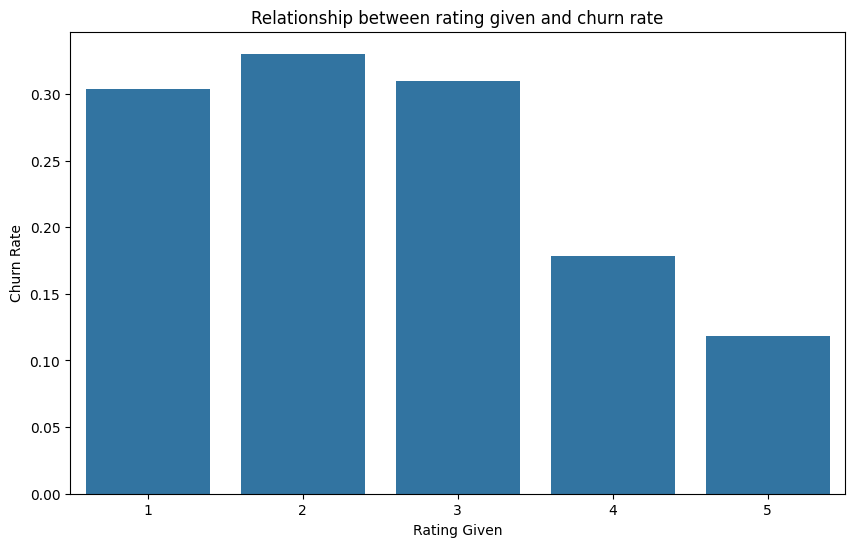

In [203]:

# Caculate rating given churn rate
rating_churnrate = data.groupby('Rating_Given')['Churned'].mean().reset_index()

# visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=rating_churnrate, x='Rating_Given', y='Churned')
plt.title('Relationship between rating given and churn rate')
plt.xlabel('Rating Given')
plt.ylabel('Churn Rate')
plt.show()

# The highest Churn rates for scores 1, 2, and 3 are all above 30%

### ⑧Relationship between devices used & churn rate

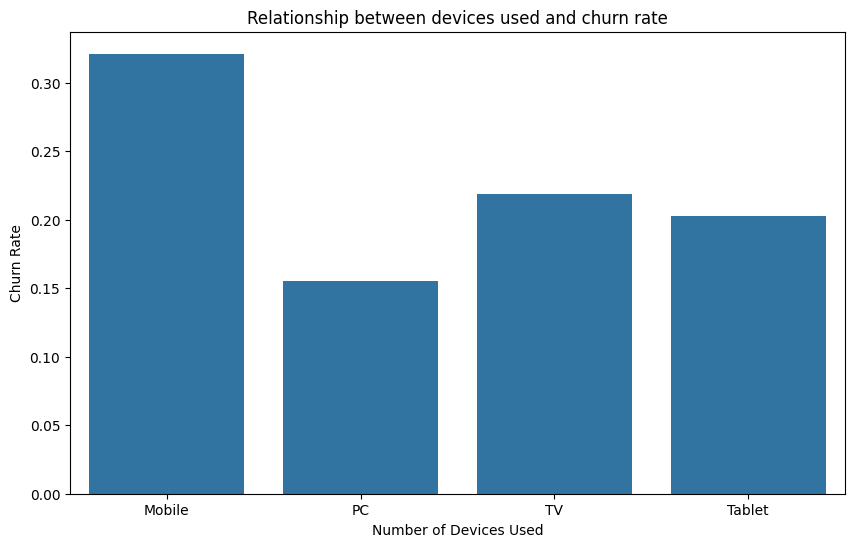

In [204]:
# Analyze the relationship between churned and Devices
# Caculate differents devices'user churn rate
churnrate_by_devices = data.groupby('Devices_Used')['Churned'].mean().reset_index()
churnrate_by_devices.columns = ['Devices_Used', 'Churn_Rate']

# visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=churnrate_by_devices, x='Devices_Used', y='Churn_Rate')
plt.title('Relationship between devices used and churn rate')
plt.xlabel('Number of Devices Used')
plt.ylabel('Churn Rate')
plt.show()

#The highest Churn rate is Mobile device

### ⑨Relationship between Customer Engagement and Favorite Genres

In [200]:
#Add a column of Customer Engagement, Average Session Length ≥ 1.89 is considered high.
data['Customer_Engagement'] = data['Average_Session_Length'].apply(lambda x: 'High' if x >= 1.89 else 'Low')

# show add column
print(data[['Average_Session_Length', 'Customer_Engagement']].head())


   Average_Session_Length Customer_Engagement
0                1.195762                 Low
1                0.809002                 Low
2                1.153570                 Low
3                0.609503                 Low
4                0.359971                 Low


In [201]:
# Analyze the Favorite_Genre that high engagment customers prefer
high_engagement_data = data[data['Customer_Engagement'] == 'High']
favorite_genre_counts = high_engagement_data['Favorite_Genre'].value_counts()

print(favorite_genre_counts)

Favorite_Genre
Action         83
Drama          77
Comedy         73
Documentary    70
Sci-Fi         66
Name: count, dtype: int64


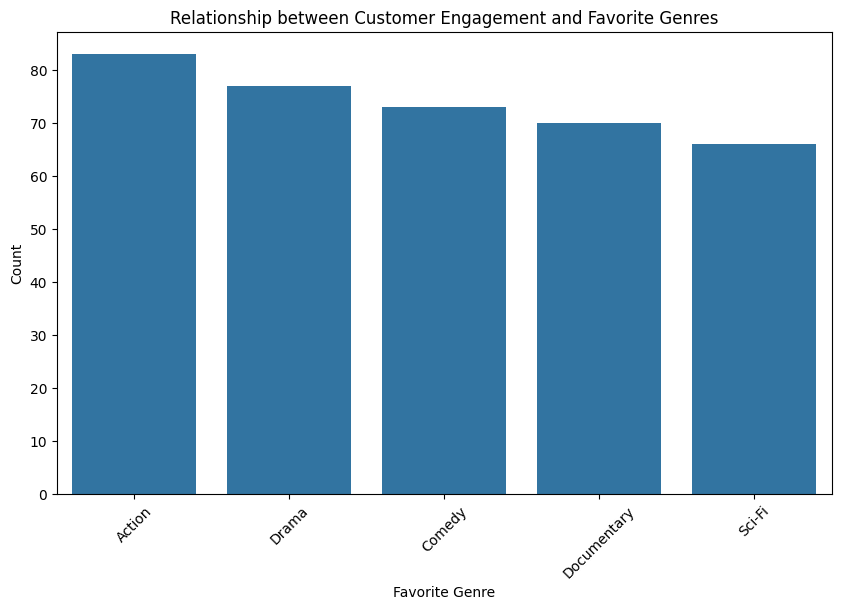

In [205]:
# visualization it
plt.figure(figsize=(10, 6))
sns.barplot(x=favorite_genre_counts.index, y=favorite_genre_counts.values)
plt.title('Relationship between Customer Engagement and Favorite Genres')
plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#High customer engagement are more inclined to watch movies related to Action and Drama